In [ ]:
#Exercise 0

In [5]:
def github() -> str:

    return "https://github.com/rohund/Problem-Set/blob/main/ProblemSet4.py"

In [6]:
#Exercise 1

In [24]:
import pandas as pd

def load_data() -> pd.DataFrame:
    url = "https://lukashager.netlify.app/econ-481/data/TSLA.csv"
    result = pd.read_csv(url, index_col=0, parse_dates=True)
   
    return result



In [24]:
#Exercise 2

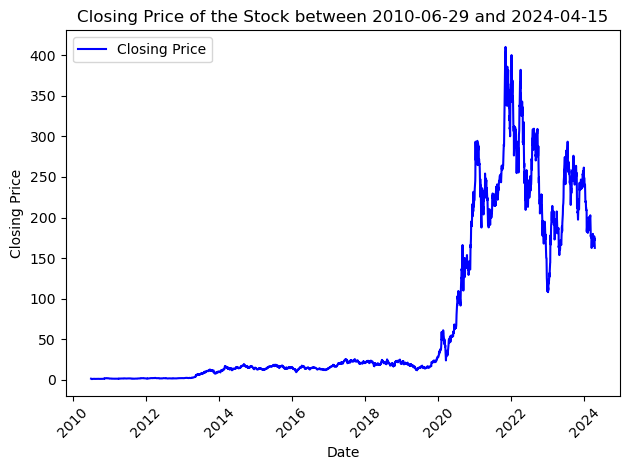

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_close(df: pd.DataFrame, start: str = '2010-06-29', end: str = '2024-04-15') -> None:

    df['Date'] = pd.to_datetime(df['Date'])
    
    filtered_df = df[(df['Date'] >= start) & (df['Date'] <= end)]
    
    fig, ax = plt.subplots()
    ax.plot(filtered_df['Date'], filtered_df['Close'], color='blue', label='Closing Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.set_title(f'Closing Price of the Stock between {start} and {end}')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

data_url = "https://lukashager.netlify.app/econ-481/data/TSLA.csv"
df = pd.read_csv(data_url)

plot_close(df)


In [ ]:
#Exercise 3

In [29]:
import pandas as pd
import statsmodels.api as sm

def autoregress(df: pd.DataFrame) -> float:

    df['Change'] = df['Close'].diff()

    df['Lagged_Change'] = df['Change'].shift(1)

    df = df.dropna()

    y = df['Change']
    X = sm.add_constant(df['Lagged_Change'])
    model = sm.OLS(y, X).fit(cov_type='HC1')

    t_stat = model.tvalues.iloc[1] 

    return t_stat

data_url = "https://lukashager.netlify.app/econ-481/data/TSLA.csv"
df = pd.read_csv(data_url)

df = load_data()
result = autoregress(df)

print("T-Statistic:", result)

T-Statistic: -0.7855901173373059


In [ ]:
#Excercise 4

In [31]:
import pandas as pd
import statsmodels.formula.api as smf

def autoregress_logit(df: pd.DataFrame) -> float:

    df['Change'] = df['Close'].diff()

    df['Lagged_Change'] = df['Change'].shift(1)

    df['Positive_Change'] = (df['Change'] > 0).astype(int)

    df = df.dropna()

    logit_model = smf.logit('Positive_Change ~ Lagged_Change', data=df).fit()

    t_stat = logit_model.tvalues['Lagged_Change']

    return t_stat

data_url = "https://lukashager.netlify.app/econ-481/data/TSLA.csv"
df = pd.read_csv(data_url)

result = autoregress_logit(df)

print("T-Statistic:", result)


Optimization terminated successfully.
         Current function value: 0.692353
         Iterations 3
T-Statistic: -1.2214457812356476


In [ ]:
#Exercise 5

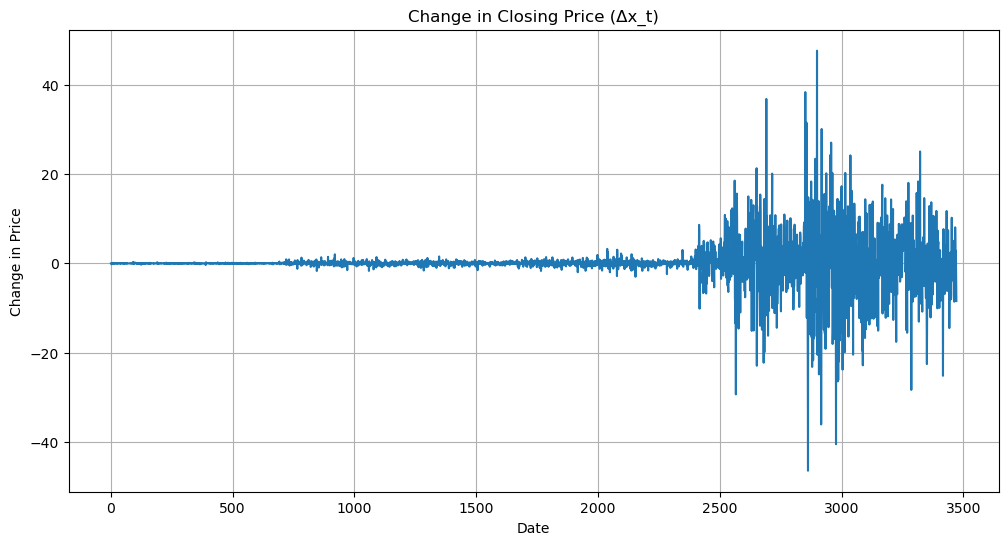

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_delta(df: pd.DataFrame) -> None:

    df['Change'] = df['Close'].diff()

    df = df.dropna()

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Change'])
    plt.title("Change in Closing Price (Δx_t)")  
    plt.xlabel("Date")
    plt.ylabel("Change in Price")
    plt.grid(True)
    plt.show()

data_url = "https://lukashager.netlify.app/econ-481/data/TSLA.csv"
df = pd.read_csv(data_url)

plot_delta(df)
